# **Manipulating colorspaces**

Images to use: 
  - [ball_image](https://drive.google.com/file/d/1wcqa7NHc9KALs6F86_vRczjcitmK7tGA/view?usp=sharing)

# **Segmentation in RGB**

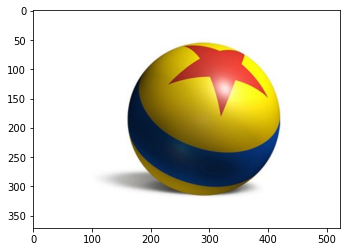

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Take an image
image = cv2.imread("/content/drive/MyDrive/Patrones/patrones/Clase3/ball_image.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow (image)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


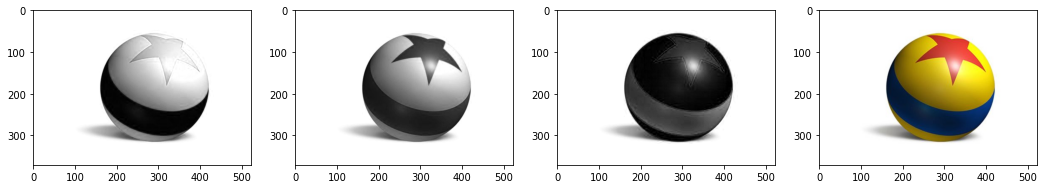

In [16]:
fig, axes = plt.subplots (1,4, figsize = (18,7))# SUBPLOT grafico varios plots ala vez 
axes[0].imshow(image[:,:,0], cmap = 'gray');# axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].imshow(image[:,:,1], cmap = 'gray');# axes[1].set_xticks([]); axes[1].set_yticks([])
axes[2].imshow(image[:,:,2], cmap = 'gray');# axes[2].set_xticks([]); axes[2].set_yticks([])
axes[3].imshow(image[:,:,:])
# plt.show()

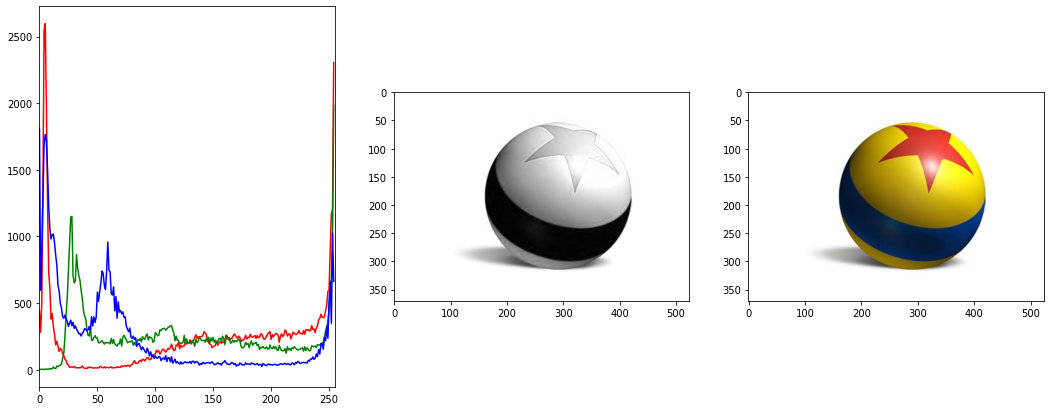

In [29]:
image = cv2.imread("/content/drive/MyDrive/Patrones/patrones/Clase3/ball_image.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#importante que depende el formato que tiene mi amagen con respecto al color tambien cambiarle mi variable color
color = ('r','g','b')
#color = ('b','g','r')

fig, axes = plt.subplots (1,3, figsize = (18,7))
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[ 255],[ 0, 255])
    axes[0].plot(histr,color = col)
    
axes[0].set_xlim([0, 255])
axes[1].imshow(image[:,:,0], cmap="gray")
axes[2].imshow(image)
plt.show()

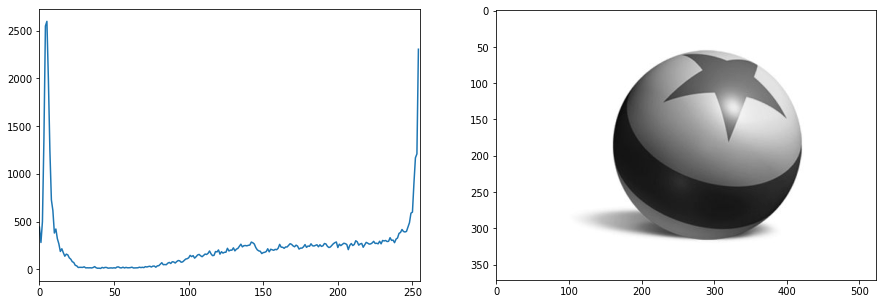

In [30]:
#para colocar una imgen en escala de grices solo le agrego el cero al final de la ruta
image_gray =cv2.imread("/content/drive/MyDrive/Patrones/patrones/Clase3/ball_image.jpg",0)

fig, axes = plt.subplots (1,2, figsize = (15,5))
histr = cv2.calcHist([image],[ 0 ],None,[ 255 ],[ 0, 255 ])
axes[0].plot(histr)
axes[0].set_xlim([0,255])

axes[1].imshow( image_gray,cmap="gray" )
#plt.show()

## Segment one zone - The star

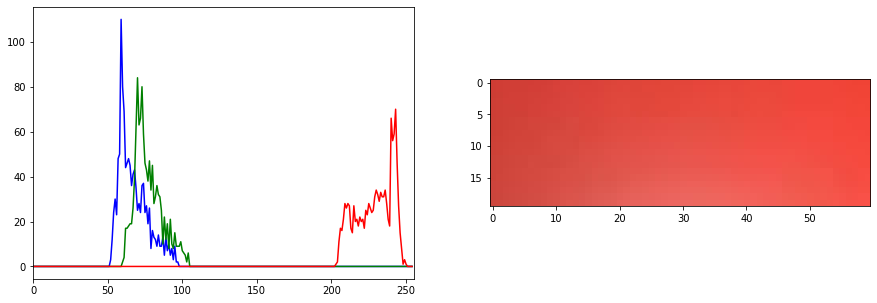

In [34]:
image = cv2.imread("/content/drive/MyDrive/Patrones/patrones/Clase3/ball_image.jpg")

roi =image[90:110,290:350,:]

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ 255],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    
axes[0].set_xlim([0,255])
axes[1].imshow( cv2.cvtColor(roi,cv2.COLOR_BGR2RGB) )
plt.show()

In [35]:
lower_red = np.uint8([[[ 50 , 60 , 200 ]]])
upper_red = np.uint8([[[ 100 , 115 , 255 ]]])

In [39]:
mask = np.zeros ([image.shape[0], image.shape[1]], dtype = "uint8")

for i in range(image.shape[0]) :
  for j in range(image.shape[1]):
    if lower_red[0,0,0] < image[i,j,0] < upper_red[0,0,0] and \
       lower_red[0,0,1] < image[i,j,1] < upper_red[0,0,1] and \
       lower_red[0,0,2] < image[i,j,2] < upper_red[0,0,2] :
      mask[i,j] = 255
    else: 
      mask[i,j] = 0

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [40]:
def segment_color (image, lower_color, upper_color): 
  #
  mask = np.zeros ([image.shape[0], image.shape[1]], dtype = "uint8")
  
  for i in range(image.shape[0]) :
    for j in range(image.shape[1]):
      if lower_color[0,0,0] < image[i,j,0] < upper_color[0,0,0] and \
         lower_color[0,0,1] < image[i,j,1] < upper_color[0,0,1] and \
         lower_color[0,0,2] < image[i,j,2] < upper_color[0,0,2] :
        mask[i,j] = np.int(255)
      else: 
        mask[i,j] = np.int(0)
  return mask

In [41]:
mask = segment_color (image, lower_red, upper_red)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

[]

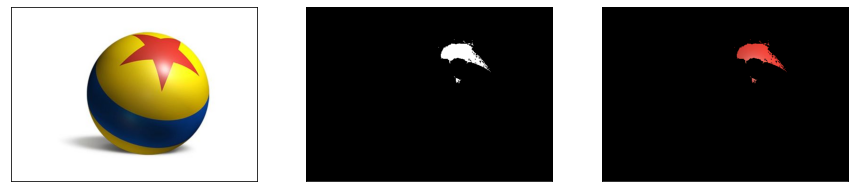

In [43]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( cv2.cvtColor(image,cv2.COLOR_BGR2RGB) ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
axes[1].imshow( mask,cmap="gray"); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( cv2.cvtColor(res,cv2.COLOR_BGR2RGB) ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result

## Segment another zone - Blue ribbon

In [ ]:
roi = 

color = ('b','g','r')
fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( _ )
plt.show()

In [ ]:
# define range of blue color in BGR
lower_blue = np.uint8([[[ _ , _ , _ ]]])
upper_blue = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color (image, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result

# **Segmentation in HSV - More robustness**

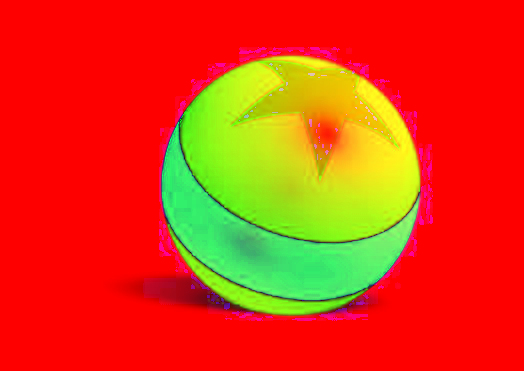

In [ ]:
# Take an image
image = 

# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow (image)

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow(hsv_image[:,:,0], cmap = 'gray');# axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].imshow(hsv_image[:,:,1], cmap = 'gray');# axes[1].set_xticks([]); axes[1].set_yticks([])
axes[2].imshow(hsv_image[:,:,2], cmap = 'gray');# axes[2].set_xticks([]); axes[2].set_yticks([])

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([hsv_image],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow(hsv_image)

## Segment first zone in HSV

In [ ]:
roi = 

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( _ )

In [ ]:
# define range of blue color in BGR
lower_red_hsv = np.uint8([[[ _ , _ , _ ]]])
upper_red_hsv = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color ( _ , _ , _ )

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image in RGB
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result in RGB

## Segment second zone in HSV

In [ ]:
roi = 

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [ ]:
# define range of blue color in BGR
lower_blue_hsv = np.uint8([[[ _ , _ , _ ]]])
upper_blue_hsv = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color ( _ , _ , _ )

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image in RGB
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result in RGB